## Runs DE on different clusters. 
Does this over each donor and combined

In [1]:
# Input info
# se_f = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/SE.rds"
# sample_names = "preB,postB"
# outdir = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/genes_donors_DE_minPct_00_pval0.1"

se_f = "/data/Mito_Trace/output/aggregate/CHIP_aggr/data/annotation/gff_A2/mergedSamples/allSamples.integrated.rds"
outdir = "/data/Mito_Trace/output/aggregate/CHIP_aggr/data/annotation/gff_A2/mergedSamples/de_btwnclust_RNA/minPct_0.1_logfc0.1"
sample_names = "CHIP_b1_Control,CHIP_b1_Flt3l,CHIP_b1_Input,CHIP_b2_Input,CHIP_a1_Input,CHIP_a1_Flt3l,cd34norm_Control,cd34norm_Flt3l"

# Parameters
assay="RNA"
minPct = 0.1
logfcthresh = 0.1
p_thresh=0.1

top_de = 3

# test.use="wilcox"
# latent.vars = "NULL"

# Parallel processing
cores = 24

# R utils script
utils_script <- "/data/Mito_Trace/R_scripts/seurat_utils.R"
to_donors = FALSE


In [2]:
source(utils_script)
outdir = outdir
dir.create(outdir, showWarnings = FALSE)


Registered S3 method overwritten by 'spatstat.core':
  method          from
  formula.glmmPQL MASS

Attaching SeuratObject

Attaching sp

Warning message:
“package ‘dplyr’ was built under R version 4.1.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
sample_names <- unlist(strsplit(sample_names, ",")[[1]])
sample_names

[1] "CHIP_b1_Control"  "CHIP_b1_Flt3l"    "CHIP_b1_Input"    "CHIP_b2_Input"   
[5] "CHIP_a1_Input"    "CHIP_a1_Flt3l"    "cd34norm_Control" "cd34norm_Flt3l"

In [4]:
library(GenomicRanges)
library(Seurat)
library(Signac)
library(GenomeInfoDb)
library(EnsDb.Hsapiens.v75)
library(ggplot2)
library(patchwork)
set.seed(1234)
library(data.table)
library(magrittr)
library(cowplot)
library(metap)
library("RColorBrewer")

library(future)
plan()

plan("multiprocess", workers = cores)
#options(future.globals.maxSize = 50000 * 1024^2) # for 50 Gb RAM
options(future.globals.maxSize = 8000 * 1024^2)

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Warning message:
“package ‘S4Vectors’ was built under R version 4.1.2”

Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following objects are masked from 

sequential:
- args: function (..., envir = parent.frame())
- tweaked: FALSE
- call: NULL

Warning message:
"Strategy 'multiprocess' is deprecated in future (>= 1.20.0). Instead, explicitly specify either 'multisession' or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'."


In [5]:
se <- readRDS(se_f)#file.path(indir, paste0("allSamples.integrated.rds")))
se

An object of class Seurat 
247232 features across 47542 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap

In [6]:
se[[]]

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,TSS.enrichment,TSS.percentile,pct_reads_in_peaks,blacklist_ratio,high.tss,nucleosome_group,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,<dbl>,<int>
cd34norm1_Control_AAACGAAAGAGGTCCA-1,Control,1507,1507,16929,2587,58,70,674,9629,3911,⋯,3.380403,0.62,34.00665,0,High,NS < 4,4,4,2025,1719
cd34norm1_Control_AAACGAAAGCGATACG-1,Control,4003,4003,45359,10546,184,184,2302,22247,9896,⋯,2.696069,0.24,34.98383,0,High,NS < 4,0,0,5299,3845
cd34norm1_Control_AAACGAAAGTCGTGAG-1,Control,1199,1199,10177,2450,48,60,657,2135,4827,⋯,4.114635,0.85,20.01243,0,High,NS < 4,1,1,2066,1694
cd34norm1_Control_AAACGAACAATAGTGA-1,Control,2950,2950,22452,4364,100,83,897,9233,7775,⋯,4.115034,0.85,34.73955,0,High,NS < 4,0,0,3746,2775
cd34norm1_Control_AAACGAACACAATAAG-1,Control,1398,1398,11763,2003,43,57,680,5547,3433,⋯,3.270063,0.57,33.14885,0,High,NS < 4,4,4,1866,1641
cd34norm1_Control_AAACGAACACTGATAC-1,Control,1110,1110,9449,1971,59,21,489,3785,3124,⋯,4.084804,0.85,28.10499,0,High,NS < 4,5,5,1639,1433
cd34norm1_Control_AAACGAACAGTAACCT-1,Control,815,815,6196,1097,19,17,288,2635,2140,⋯,2.374549,0.10,30.42056,0,High,NS < 4,7,7,1258,1155
cd34norm1_Control_AAACGAACATCGTGAT-1,Control,7591,7591,100024,36721,588,531,5317,36828,20039,⋯,3.430336,0.64,36.24432,0,High,NS < 4,14,14,10348,5960
cd34norm1_Control_AAACGAAGTAACGGTG-1,Control,1232,1232,8454,1950,24,33,354,3729,2364,⋯,2.933067,0.38,44.07783,0,High,NS < 4,1,1,1242,1095


## Run DE for  cluster vs all others 

In [6]:
btwnClust.outdir <- file.path(outdir, "btwnClust")
dir.create(btwnClust.outdir)


[1] "cluster 0"
               p_val avg_log2FC pct.1 pct.2    p_val_adj
PLCG2   2.895805e-49 -0.5220017 0.114 0.392 5.794505e-45
ANKRD44 7.277984e-48  0.5259003 0.628 0.419 1.456325e-43
TVP23A  4.973344e-46 -0.3498266 0.034 0.274 9.951662e-42
LPCAT1  2.221961e-45 -0.4206341 0.086 0.341 4.446144e-41
PFDN1   3.172970e-45 -0.4337015 0.144 0.420 6.349113e-41
ADAM9   9.178763e-45 -0.4613041 0.244 0.533 1.836671e-40
[1] "saved cluster 0"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 1"
               p_val avg_log2FC pct.1 pct.2     p_val_adj
MAPK1  8.113292e-207  0.7392848 0.593 0.090 1.623470e-202
CDC123 2.279960e-200  0.7174858 0.593 0.092 4.562201e-196
TVP23A 3.350286e-188  0.7688801 0.673 0.141 6.703923e-184
CLMN   6.954603e-187  0.6672593 0.544 0.079 1.391616e-182
BANP   2.069851e-179  0.7585823 0.592 0.112 4.141771e-175
SIAH3  1.578287e-165  0.6744147 0.581 0.113 3.158153e-161
[1] "saved cluster 1"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 2"
              p_val avg_log2FC pct.1 pct.2    p_val_adj
GNG7   5.589686e-34 -0.3750258 0.173 0.497 1.118496e-29
MOB3A  2.921530e-29 -0.3005902 0.171 0.478 5.845981e-25
RELA   4.291140e-29 -0.2861981 0.173 0.480 8.586571e-25
TMEM91 1.727280e-27 -0.3183283 0.217 0.527 3.456286e-23
DNAH17 6.080011e-27 -0.3412717 0.305 0.622 1.216610e-22
DKKL1  1.015593e-26 -0.3211284 0.253 0.565 2.032201e-22
[1] "saved cluster 2"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 3"
                     p_val avg_log2FC pct.1 pct.2     p_val_adj
RNF103-CHMP3 3.357216e-123  0.9171994 0.752 0.285 6.717789e-119
CHMP3        4.350081e-123  0.9169298 0.752 0.286 8.704512e-119
KLRC4-KLRK1   4.832457e-84  0.4369801 0.391 0.084  9.669746e-80
DKK2          1.243977e-36  0.4533115 0.907 0.706  2.489198e-32
ANKRD6        4.645690e-33  0.4294474 0.885 0.680  9.296027e-29
RHOH          2.374233e-27  0.3733322 0.728 0.491  4.750839e-23
[1] "saved cluster 3"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 4"
                p_val avg_log2FC pct.1 pct.2    p_val_adj
C10ORF68 4.791296e-43  0.6324593 0.807 0.557 9.587383e-39
ATXN1    6.164626e-38  0.5520842 0.904 0.703 1.233542e-33
NBEAL1   1.672600e-31  0.5180847 0.592 0.317 3.346872e-27
MKLN1    7.934056e-30  0.5201333 0.938 0.821 1.587605e-25
BRIP1    1.750494e-27  0.4335581 0.765 0.513 3.502739e-23
FAM129A  4.021052e-22  0.4290504 0.490 0.272 8.046126e-18
[1] "saved cluster 4"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 5"
                 p_val avg_log2FC pct.1 pct.2     p_val_adj
FANCI    2.342108e-299  0.8685839 0.757 0.050 4.686558e-295
TGM3     9.097283e-280  0.6736504 0.686 0.040 1.820366e-275
FAM181A  2.043115e-259  0.3664529 0.416 0.006 4.088272e-255
TMEM87B  7.500273e-257  0.8250333 0.698 0.051 1.500805e-252
SIGLECL1 4.593737e-255  0.4048237 0.471 0.013 9.192068e-251
NPTX1    3.726196e-251  0.3817649 0.439 0.010 7.456118e-247
[1] "saved cluster 5"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 6"
                     p_val avg_log2FC pct.1 pct.2     p_val_adj
RP11-468E2.4 8.940203e-133  0.6069870 0.410 0.033 1.788935e-128
IRF9         3.901614e-109  0.4714441 0.341 0.028 7.807129e-105
APMAP         1.713822e-95  0.8212162 0.602 0.124  3.429358e-91
HNF1B         5.833781e-91  0.7916946 0.602 0.134  1.167340e-86
STOX1         5.720683e-76  0.7098990 0.550 0.126  1.144709e-71
LILRA3        8.688100e-73  0.2628376 0.189 0.011  1.738489e-68
[1] "saved cluster 6"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 7"
                    p_val avg_log2FC pct.1 pct.2    p_val_adj
HNF1B        7.410483e-60  0.8926883 0.580 0.145 1.482838e-55
APMAP        1.006282e-54  0.7279634 0.557 0.137 2.013570e-50
GPR114       1.102869e-52  0.8191237 0.563 0.149 2.206842e-48
IRF9         1.231913e-52  0.4219604 0.293 0.037 2.465058e-48
RP11-468E2.4 2.520656e-45  0.4684321 0.305 0.047 5.043832e-41
FGFBP2       2.482047e-39  0.5908844 0.316 0.060 4.966576e-35
[1] "saved cluster 7"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 8"
               p_val avg_log2FC pct.1 pct.2    p_val_adj
ABL1    7.559329e-32  0.2811487 0.726 0.237 1.512622e-27
KIF22   2.389854e-22  0.3440827 0.911 0.430 4.782098e-18
HYOU1   6.022519e-19  0.3192946 0.911 0.440 1.205106e-14
RNF213  5.124209e-17  0.3758522 0.925 0.529 1.025354e-12
MAPKAP1 1.013639e-16  0.3693663 0.986 0.610 2.028291e-12
SKI     2.958511e-16  0.2995183 0.925 0.485 5.919980e-12
[1] "saved cluster 8"


Warning message:
"Only one identity present, the expression values will be not scaled"
The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 9"
                    p_val avg_log2FC pct.1 pct.2    p_val_adj
ZBTB16       8.056767e-56  1.0793772 0.823 0.294 1.612159e-51
GDF15        2.377425e-44  0.3767712 0.338 0.049 4.757227e-40
FLCN         1.449389e-33  0.2990887 0.300 0.049 2.900226e-29
STARD3NL     1.708987e-33  0.6593137 0.623 0.207 3.419683e-29
RP11-45M22.4 2.513520e-31  0.3409903 0.362 0.075 5.029554e-27
QPCT         1.412243e-30  0.4190948 0.454 0.114 2.825899e-26
[1] "saved cluster 9"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 10"
                p_val avg_log2FC pct.1 pct.2    p_val_adj
FOXRED2  7.540013e-62  0.6816585 0.579 0.019 1.508757e-57
EIF3D    7.420706e-56  0.6847203 0.684 0.031 1.484883e-51
FBL      3.213626e-52  0.2877178 0.316 0.006 6.430465e-48
SLC5A3   3.091683e-51  0.8604934 0.684 0.034 6.186458e-47
SLC5A3.1 3.091683e-51  0.8604934 0.684 0.034 6.186458e-47
IGSF5    5.444908e-51  0.9208795 0.737 0.040 1.089526e-46
[1] "saved cluster 10"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



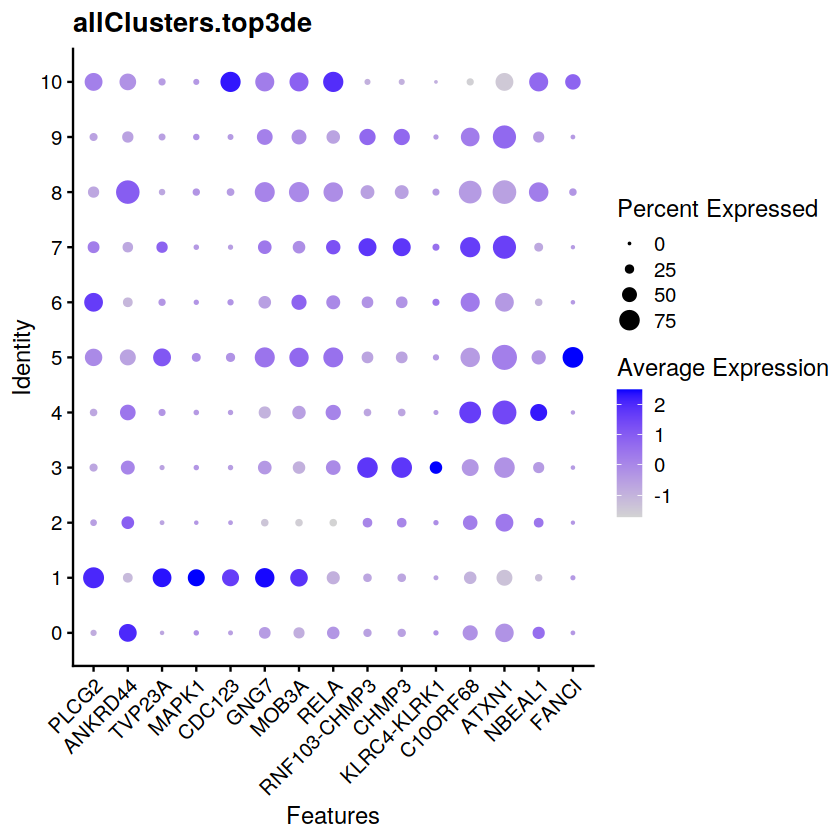

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



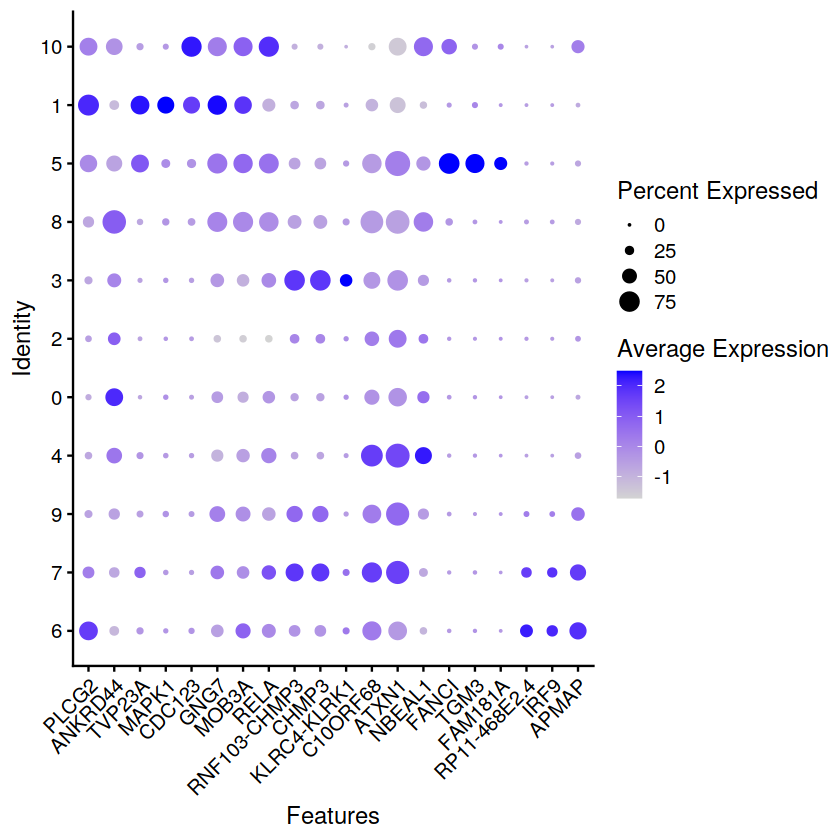

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



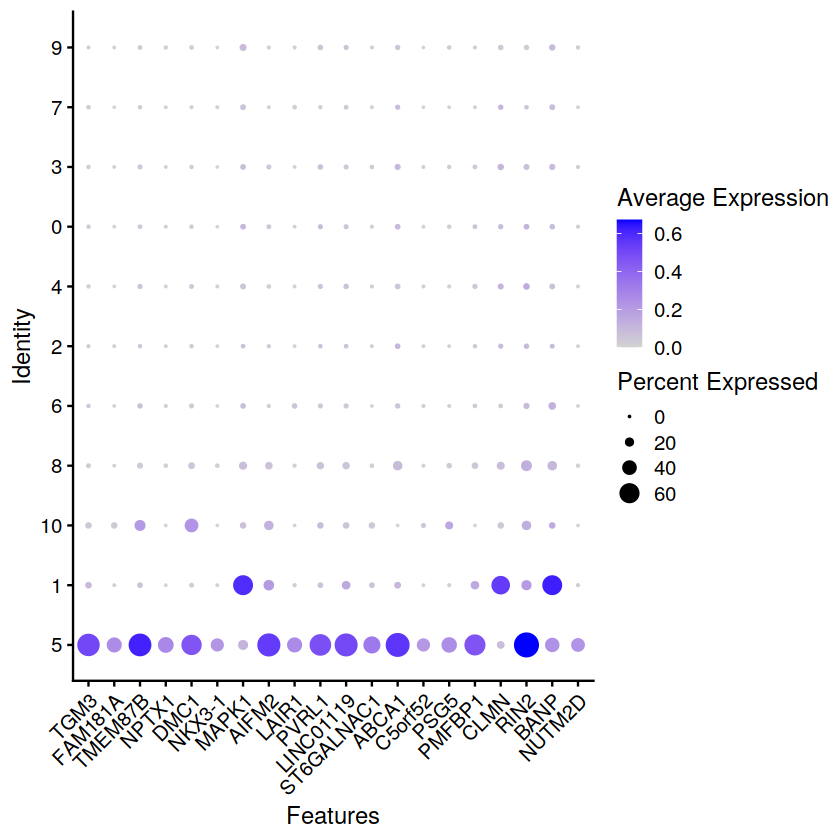

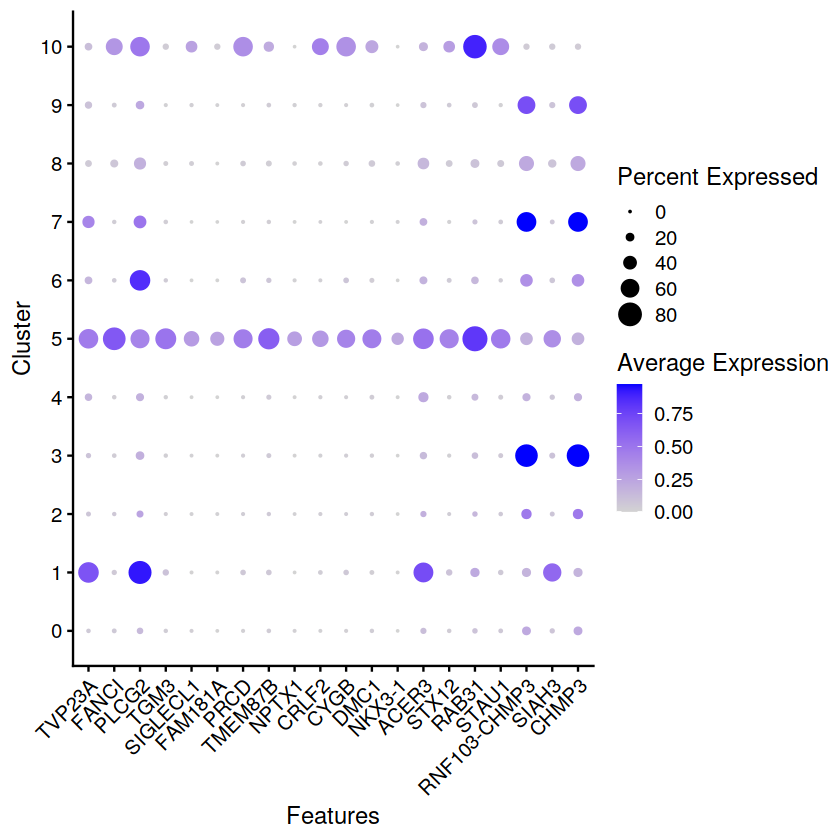

In [7]:
curr.outdir <- btwnClust.outdir

cluster.ids <- sort(unique(se$seurat_clusters))
Idents(se) <- se$seurat_clusters

all.pvals <- data.frame(matrix(nrow=dim(se)[1],ncol=0),
                          row.names=row.names(se))
all.names.sig <- c()
for (id1 in cluster.ids){ #or however many clusters you have
try({
    print(paste("cluster", id1))
    response <- FindMarkers(
                  object = se,
                  ident.1 = id1, #"CD4 Naive",
                  min.pct = minPct, logfc.threshold=logfcthresh,
                  test.use = 'wilcox', latent.vars = NULL
                )
    print(head(response))
    #write.csv(response, file=file.path(clust_outdir, paste0("cluster_",i,"vsAll.DE.csv")))
    
    
    print(paste('saved cluster', id1))
    response <- response %>% dplyr::arrange(p_val)
    response$p_val_adj_BH <- stats::p.adjust(response$p_val, method = "BH", n = length(response$p_val))    
    write.csv(response,
              file=file.path(curr.outdir, paste0("cluster",id1,".DE.csv")), quote=F)
    
    curr.sig <- response %>% dplyr::filter(p_val_adj_BH<p_thresh)
    
    
    names.sig <- rownames(curr.sig)
    se.filt <- subset(se, seurat_clusters == id1)
    
    # Add to all pvals
    all.names.sig <- c(all.names.sig, head(names.sig, top_de))
    all.pvals[names.sig,id1] <- curr.sig$p_val_adj_BH
    de.plots(se.filt, names.sig, curr.outdir, curr.name=id1, max.size=10, to.heat=T,to.vln=T)
    
})
}


all.names.sig <- unique(all.names.sig)
de.plots(se, all.names.sig, curr.outdir, curr.name="allClusters.top3de", max.size=15)

dot <- DotPlot(se, scale=T,
               features = head(all.names.sig,20), 
               cluster.idents=T) + RotatedAxis()
dot
ggsave(file.path(curr.outdir, "allClusters.top3de.png"))
ggsave(file.path(curr.outdir, "allClusters.top3de.pdf"))

## b) averaged top p-values (only average ones that were DE)

sig.all.ordered <- sort(rowMeans(-log10(all.pvals),na.rm=T), decreasing=T)
dot <- DotPlot(se, scale=F,
               features = names(head(sig.all.ordered,20)), 
               cluster.idents=T) + RotatedAxis()
dot
ggsave(file.path(curr.outdir, "allClusters.pvalsOrdered.scaleF.png"))
ggsave(file.path(curr.outdir, "allClusters.pvalsOrdered.scaleF.pdf"))
#de.plots(se, names(sig.all.ordered), outdir, curr.name="allDonors.allClusters.pvalsOrdered", max.size=20)



all.pvals.nafill <- all.pvals
all.pvals.nafill[,] <- -log10(zoo::na.fill(all.pvals,1))

sig.all.ordered <- sort(rowMeans(all.pvals.nafill), decreasing=T)
dot <- DotPlot(se, scale=F,
               features = head(names(sig.all.ordered),20), 
               cluster.idents=F) + RotatedAxis() + ylab("Cluster")
ggsave(file.path(btwnClust.outdir,
                 "allClusters.ovalsOrderedNA.scaleF.png"))
ggsave(file.path(btwnClust.outdir,
                 "allClusters.ovalsOrderedNA.scaleF.pdf"))
dot

In [8]:
btwn_embeddings <- file.path(btwnClust.outdir, "embeddings")
dir.create(btwn_embeddings)


featplot <- function(name.sig, se, curr.outdir){
    feat <- FeaturePlot(se,  features=name.sig)
    ggsave(plot=feat,
           file=file.path(curr.outdir, paste0(name.sig,".embedFeat.top.png")))
    }

sapply(all.names.sig, FUN=featplot, se=se, curr.outdir=btwn_embeddings)

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



PLCG2 
       "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/genes_donors_DE_minPct_00_pval0.1/btwnClust/embeddings/PLCG2.embedFeat.top.png" 
                                                                                                                                                                                                                                                                                                                                         ANKRD44 
     "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/genes_donors_DE_minPct_00_pval0.1/btwnClust/embeddings/ANKRD44.embedFeat.top.png" 
                                                                                                                                                                                                                                                                                                                                          TVP23A 
      "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/genes_donors_DE_minPct_00_pval0.1/btwnClust/embeddings/TVP23A.embedFeat.top.png" 
                                                                                                                                                                                                                                                                                                                                           MAPK1 
       "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/genes_donors_DE_minPct_00_pval0.1/btwnClust/embeddings/MAPK1.embedFeat.top.png" 
                                                                                                                                                                                                                                                                                                                                          CDC123 
      "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/genes_donors_DE_minPct_00_pval0.1/btwnClust/embeddings/CDC123.embedFeat.top.png" 
                                                                                                                                                                                                                                                                                                                                            GNG7 
        "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/genes_donors_DE_minPct_00_pval0.1/btwnClust/embeddings/GNG7.embedFeat.top.png" 
                                                                                                                                                                                                                                                                                   

---

---

---

# Run cluster vs all for each donor

In [11]:
if(to_donors) {
    source("/data/Mito_Trace/R_scripts/plot_de_over_all.R") 
    
    btwnClust.sepDons.outdir <- file.path(outdir, "btwnClust_sepDons")
    dir.create(btwnClust.sepDons.outdir)
    curr.outdir <- btwnClust.sepDons.outdir

    # Setup Idents to include the condition, clusters and donor
    se$clust_donor <- as.factor(apply(se[[]][ , c( "seurat_clusters", "donor") ] , 1 , paste , collapse = "_" ))
    Idents(se) <- se$clust_donor
    don.ids <- levels(se$donor)
    cluster.ids <- sort(unique(se$seurat_clusters))

    all.pvals <- data.frame(matrix(nrow=dim(se)[1],ncol=0),
                              row.names=row.names(se))
    all.names.sig <- c()

    for (clust in cluster.ids){ #or however many clusters you have
        clust.names.sig <- c()
        print("cluster")
        print(clust)
        clust.pvals <- data.frame(matrix(nrow=dim(se)[1],ncol=0),
                                  row.names=row.names(se))
        clust.outdir <- file.path(curr.outdir, paste0("clust", clust))
        dir.create(clust.outdir)
        for (don in don.ids){
            try({
                if (clust == "None" | don == "None"){
                    print("clust or don is none")
                    next
                }
                id1 = paste0(clust, "_", don)
                print("ID1")
                print(id1)
                response <- FindMarkers(
                              object = se,
                              ident.1 = id1, #"CD4 Naive",
                              min.pct = minPct,
                              test.use = 'wilcox', latent.vars = NULL
                            )

                #write.csv(response, file=file.path(clust_outdir, paste0("cluster_",i,"vsAll.DE.csv")))
                response <- response %>% dplyr::arrange(p_val)
                response$p_val_adj_BH <- stats::p.adjust(response$p_val, method = "BH", n = length(response$p_val))    
                print(head(response))
                write.csv(response,
                          file=file.path(clust.outdir, paste0("clust",clust,"donor", don, ".DE.csv")), quote=F)

                curr.sig <- response %>% dplyr::filter(p_val_adj_BH<p_thresh)
                names.sig <- rownames(curr.sig)
                se.filt <- subset(se, idents = id1)
                de.plots(se.filt, names.sig, clust.outdir, curr.name=id1, max.size=10, to.heat=T,to.vln=T)

                # Add to all pvals
                all.names.sig <- c(all.names.sig, head(names.sig, top_de))
                all.pvals[names.sig,id1] <- curr.sig$p_val_adj_BH
                clust.names.sig <- c(clust.names.sig, head(names.sig, top_de))
                clust.pvals[names.sig, don] <- curr.sig$p_val_adj_BH
            })
        }
        if (clust != "None"){
            se.filt <- subset(se, subset = seurat_clusters == clust & donor != "None")
            Idents(se.filt) <- se.filt$donor
            wrap.plot.over.all(se.filt, clust.outdir, clust.pvals, clust.names.sig, 
                               name=paste0("cluster",clust,"topDonorDE.split_donors"))
        }
    }

    wrap.plot.over.all(se, curr.outdir, all.pvals, all.names.sig, name="allClusters")
}

In [11]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.3 LTS

Matrix products: default
BLAS/LAPACK: /home/isaac/miniconda3/envs/mttrace/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] future_1.23.0             RColorBrewer_1.1-2       
 [3] metap_1.1                 cowplot_1.1.1            
 [5] magrittr_2.0.1            data.table_1.14.2        
 [7] patchwork_1.1.1           ggplot2_3.3.5            
 [9] EnsDb.Hsapiens.v75_2.99.0 ensembldb_2.18.1         
[11] 